# Byspectrum demo

In [1]:
from byspectrum.b_density import b_density
from byspectrum.galaxy_bias import EuclidBias
import cosmox
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Density and bispectrum at equal redshifts

Let's run the CLASS code to create a CosmoX perturbations instance.

The configuration file `cosmoclass.ini` is a standard one for
CLASS. The file is passed directly to CLASS, no additional checks are
performed. Hence if we need, e.g., velocity perturbations, an option
should be included to make sure that CLASS will compute them (e.g.,
ask for redshift-space distortion rsd number counts, even though we do
not actually compute spectra with CLASS).

In [2]:
pt = cosmox.Perturbations_create_perturbs (cosmox.kCosmoclass,
                                           "cosmoclass.ini")

We create two instances of CosmoX generalized spectra, one using
default parameters (no clustering bias) and one considering spectro-z
Euclid galaxy bias.

In [3]:
gsp = cosmox.GeneralSpectra(pt)

euclid_bias = EuclidBias()
gsp_Euclid = cosmox.GeneralSpectra(pt, euclid_bias)

Compute the equal redshifts (z=0.5) density reduced bispectrum for
matter and Euclid galaxies as a function of $\ell \equiv \ell_1 =
\ell_2 = \ell_3$.

In the galaxies case we also require linear redshift-space distortions
(not computed by default).

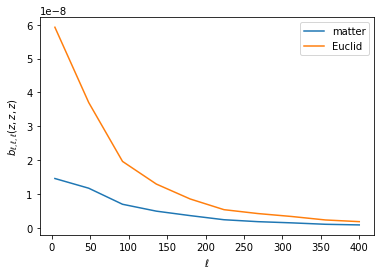

In [4]:
z1 = z2 = z3 = 1.0
l_grid = np.linspace(4, 400, 10)

b_density_grid = [b_density(l, l, l, z1, z2, z3, gsp,
                            integtype='kCquad')
                  for l in l_grid]
b_density_euclid_grid = [b_density(l, l, l, z1, z2, z3, gsp_Euclid,
                                   linear_rsd=True, integtype='kCquad')
                         for l in l_grid]

plt.plot(l_grid, b_density_grid, label='matter')
plt.plot(l_grid, b_density_euclid_grid, label='Euclid')
plt.xlabel("$\ell$")
plt.ylabel("$b_{\ell, \ell, \ell}(z, z, z)$")
plt.legend();

In the previous computation we have set the integration method to
[CQUAD](https://www.gnu.org/software/gsl/doc/html/integration.html?highlight=cquad)
that is fast but not always reliable. A more reliable method is QAG
that, however, fails more often due to roundoff errors.

*The alpha release `byspectrum v0.1` requires to adjust by hand
 precision parameters to avoid roundoff errors.*

If a roundoff error is raised, the optional parameter `epsabs` must be
set to a non-zero value. `epsabs` controls the absolute tolerance of
the integral (its value cannot be directly compared to the reduced
bispectrum due to different normalization factors). A reasonable
heuristical procedure is to set `epsabs=1e-10` and then
increase/decrease it by one more order of magnitudes until it
succeeds/give stable results, respectively.

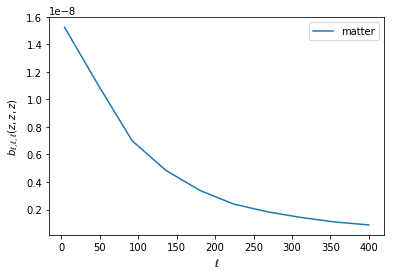

In [5]:
b_density_grid = [b_density(l, l, l, z1, z2, z3, gsp,
                            integtype='kQag', epsabs=1e-9)
                  for l in l_grid]

plt.plot(l_grid, b_density_grid, label='matter')
plt.xlabel("$\ell$")
plt.ylabel("$b_{\ell, \ell, \ell}(z, z, z)$")
plt.legend();